In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [2]:
tab_config = "O2hfcandb0config"
tab_mcrecreddppi = "O2hfmcrecreddppi"
tab_red3prong = "O2hfred3prong"
tab_red3prongml = "O2hfred3prongml_001"  # Empty
tab_red3prongscov = "O2hfred3prongscov"
tab_redb0softpi = "O2hfredb0softpi"
tab_redcollextra = "O2hfredcollextra"
tab_redcollision = "O2hfredcollision"
tab_redtrackbase = "O2hfredtrackbase"
tab_redtrackcov = "O2hfredtrackcov"
tab_redtrackpid = "O2hfredtrackpid"
tab_mcgen = "O2hfmcgenredb0"

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

/tmp/ipykernel_2193192/2096442964.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fXSecondaryVertex
Plotting fYSecondaryVertex
Plotting fZSecondaryVertex
Plotting fInvMassHypo0
Plotting fInvMassHypo1
Plotting fPtProngMin
Plotting fAbsEtaProngMin
Plotting fItsNClsProngMin
Plotting fTpcNClsCrossedRowsProngMin
Plotting fTpcChi2NClProngMax
Plotting fMlScoreBkgMassHypo0
Plotting fMlScorePromptMassHypo0
Plotting fMlScoreNonpromptMassHypo0
Plotting fMlScoreBkgMassHypo1
Plotting fMlScorePromptMassHypo1
Plotting fMlScoreNonpromptMassHypo1
Plotting fCYY
Plotting fCZY
Plotting fCZZ
Plotting fCSnpY
Plotting fCSnpZ
Plotting fCSnpSnp
Plotting fCTglY
Plotting fCTglZ
Plotting fCTglSnp
Plotting fCTglTgl
Plotting fC1PtY
Plotting fC1PtZ
Plotting fC1PtSnp
Plotting fC1PtTgl
Plotting fC1Pt21Pt2


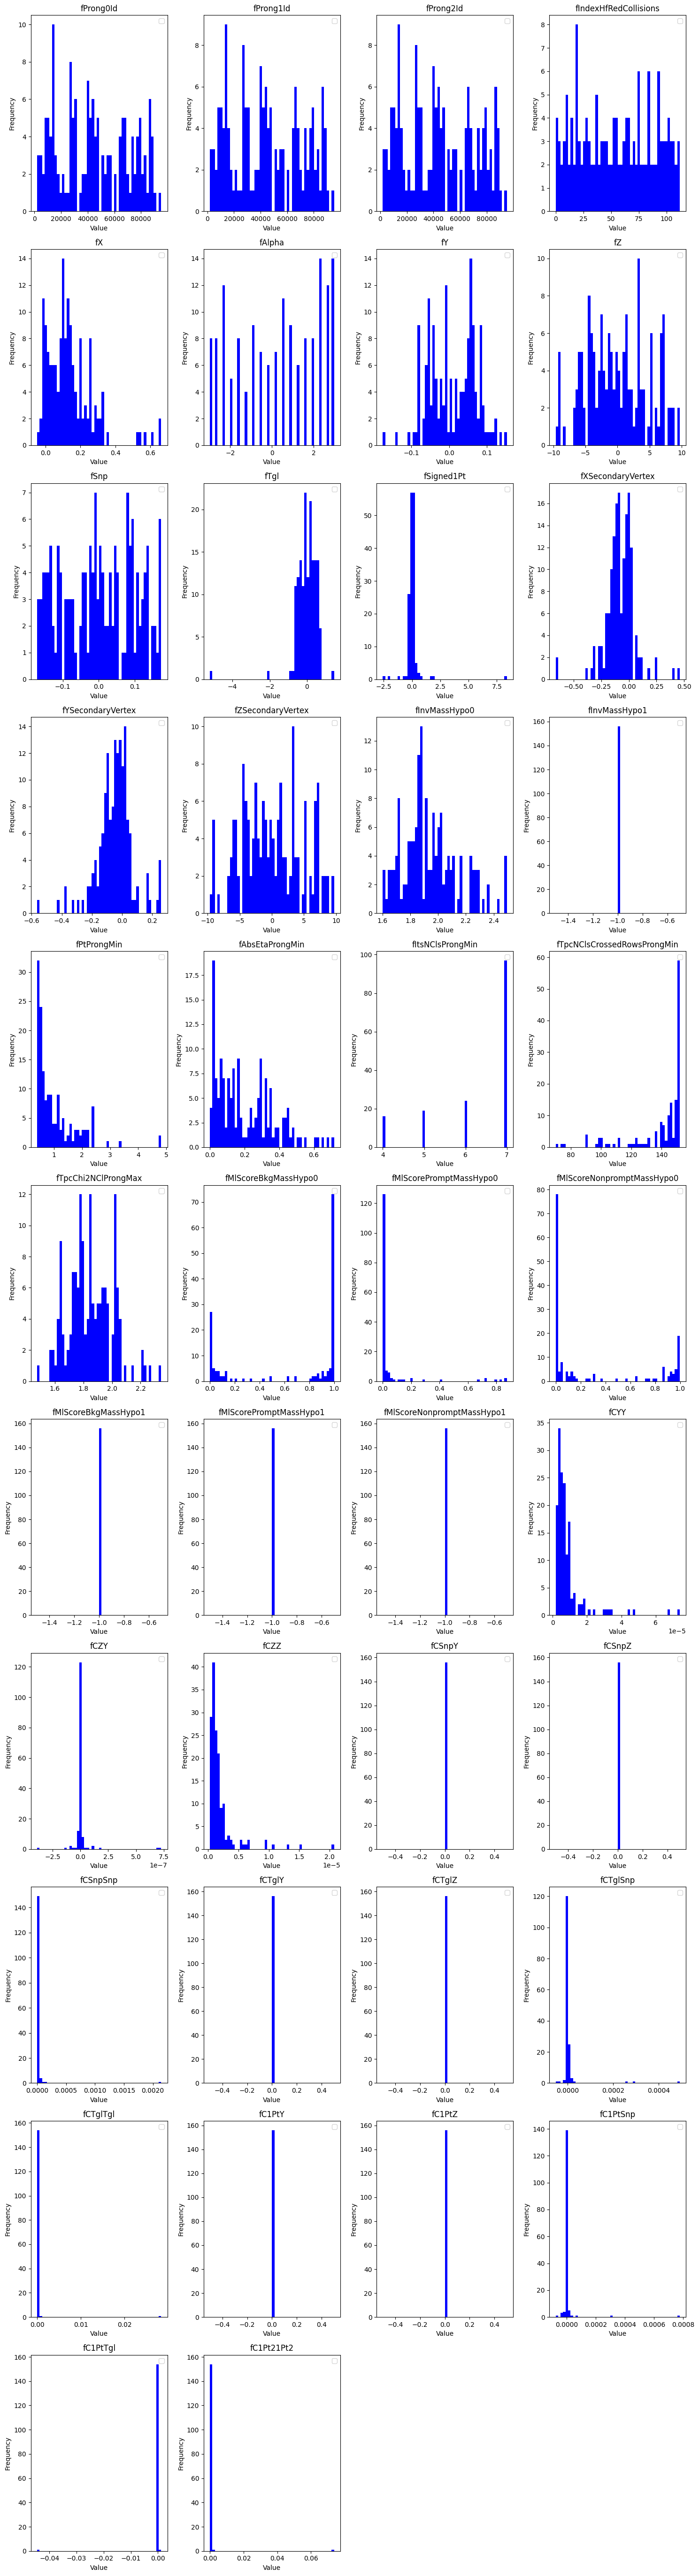

In [14]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfred3prong' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Loading: DF_2387899194678550/O2hfmcgenredb0;1
Total rows: 2781
Columns: ['fFlagMcMatchGen', 'fFlagMcDecayChanRec', 'fPtTrack', 'fYTrack', 'fEtaTrack', 'fPtProng0', 'fYProng0', 'fEtaProng0', 'fPtProng1', 'fYProng1', 'fEtaProng1', 'fHfCollisionRejectionMap', 'fCentFT0C', 'fCentFT0M']
Plotting fFlagMcMatchGen
Plotting fFlagMcDecayChanRec
Plotting fPtTrack
Plotting fYTrack
Plotting fEtaTrack
Plotting fPtProng0
Plotting fYProng0
Plotting fEtaProng0
Plotting fPtProng1
Plotting fYProng1
Plotting fEtaProng1
Plotting fHfCollisionRejectionMap
Plotting fCentFT0C
Plotting fCentFT0M


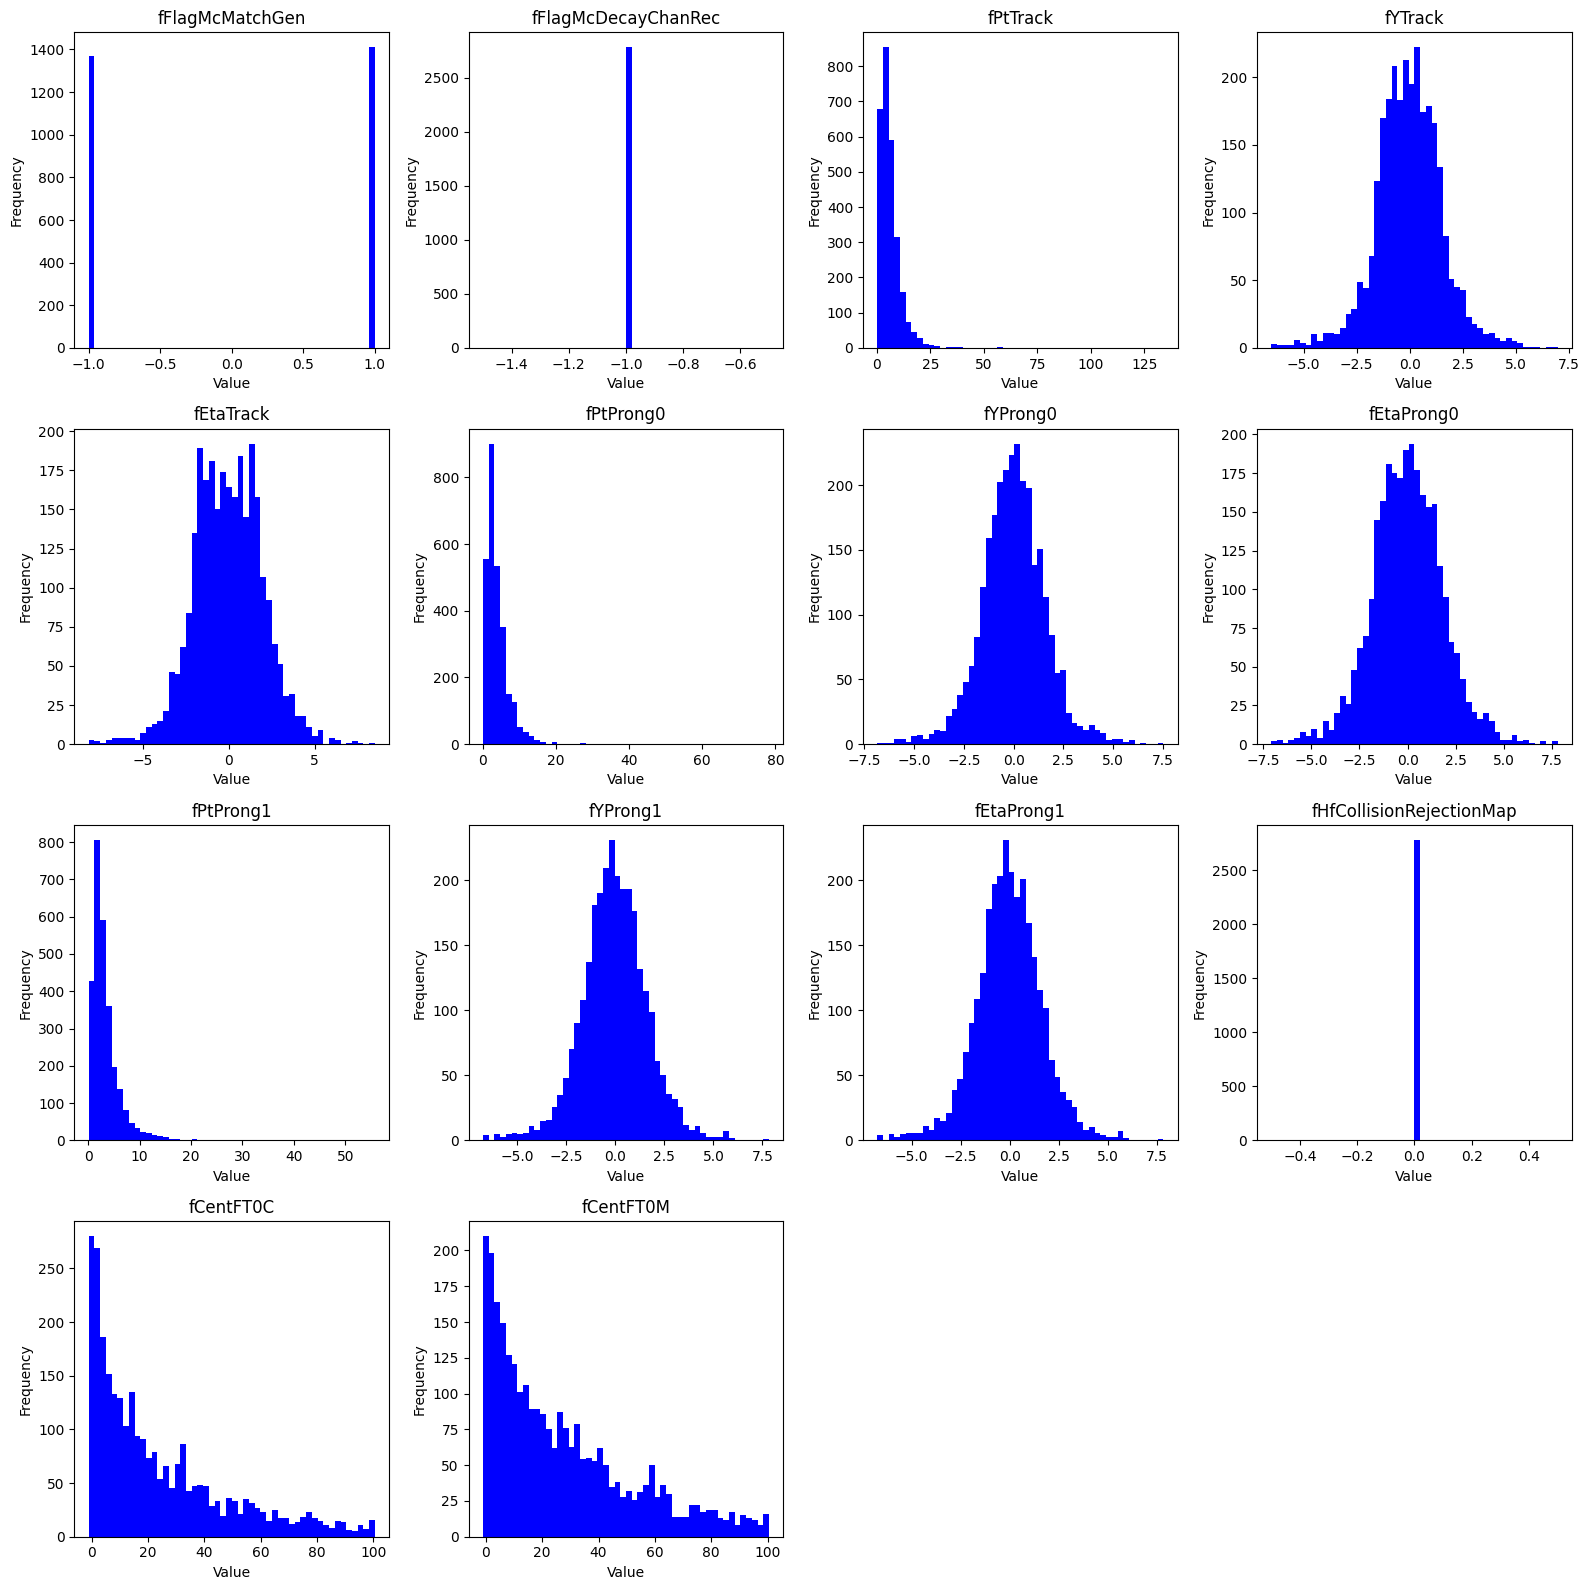

In [3]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File and pattern setup
file_path = 'Tree.root'
pattern = 'O2hfmcgenredb0'

# Load matching trees
dfs = []
with uproot.open(file_path) as f:
    for key in f.keys():
        if pattern in key:
            print(f"Loading: {key}")
            df = f[key].arrays(library='pd')
            dfs.append(df)

# Concatenate all DataFrames
if not dfs:
    raise RuntimeError(f"No trees matching '{pattern}' were found.")

full_df = pd.concat(dfs, ignore_index=True)
print(f"Total rows: {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

# Filter to valid numeric columns
valid_columns = [
    col for col in full_df.columns
    if np.issubdtype(full_df[col].dtype, np.number) and np.isfinite(full_df[col]).any()
]

# Prepare layout
n_columns = len(valid_columns)
n_rows = (n_columns + 3) // 4  # 4 plots per row
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Plot each valid column
for i, col in enumerate(valid_columns):
    print(f"Plotting {col}")
    data = full_df[col].dropna()
    axes[i].hist(data, bins=50, color='blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any unused axes
for j in range(n_columns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Loading: DF_2387899194678550/O2hfredtrackpid;1
Total rows: 201
Columns: ['fHasTPC', 'fHasTOF', 'fTPCNSigmaPi', 'fTOFNSigmaPi']
Plotting fTPCNSigmaPi
Plotting fTOFNSigmaPi


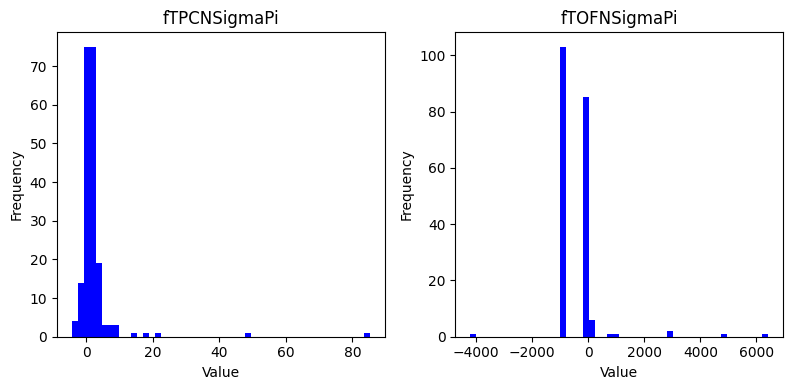

In [4]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File and pattern setup
file_path = 'Tree.root'
pattern = 'O2hfredtrackpid'

# Load matching trees
dfs = []
with uproot.open(file_path) as f:
    for key in f.keys():
        if pattern in key:
            print(f"Loading: {key}")
            df = f[key].arrays(library='pd')
            dfs.append(df)

# Concatenate all DataFrames
if not dfs:
    raise RuntimeError(f"No trees matching '{pattern}' were found.")

full_df = pd.concat(dfs, ignore_index=True)
print(f"Total rows: {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

# Filter to valid numeric columns
valid_columns = [
    col for col in full_df.columns
    if np.issubdtype(full_df[col].dtype, np.number) and np.isfinite(full_df[col]).any()
]

# Prepare layout
n_columns = len(valid_columns)
n_rows = (n_columns + 3) // 4  # 4 plots per row
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Plot each valid column
for i, col in enumerate(valid_columns):
    print(f"Plotting {col}")
    data = full_df[col].dropna()
    axes[i].hist(data, bins=50, color='blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any unused axes
for j in range(n_columns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

/tmp/ipykernel_2193192/358649453.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fCSnpSnp
Plotting fCTglY
Plotting fCTglZ
Plotting fCTglSnp
Plotting fCTglTgl
Plotting fC1PtY
Plotting fC1PtZ
Plotting fC1PtSnp
Plotting fC1PtTgl
Plotting fC1Pt21Pt2


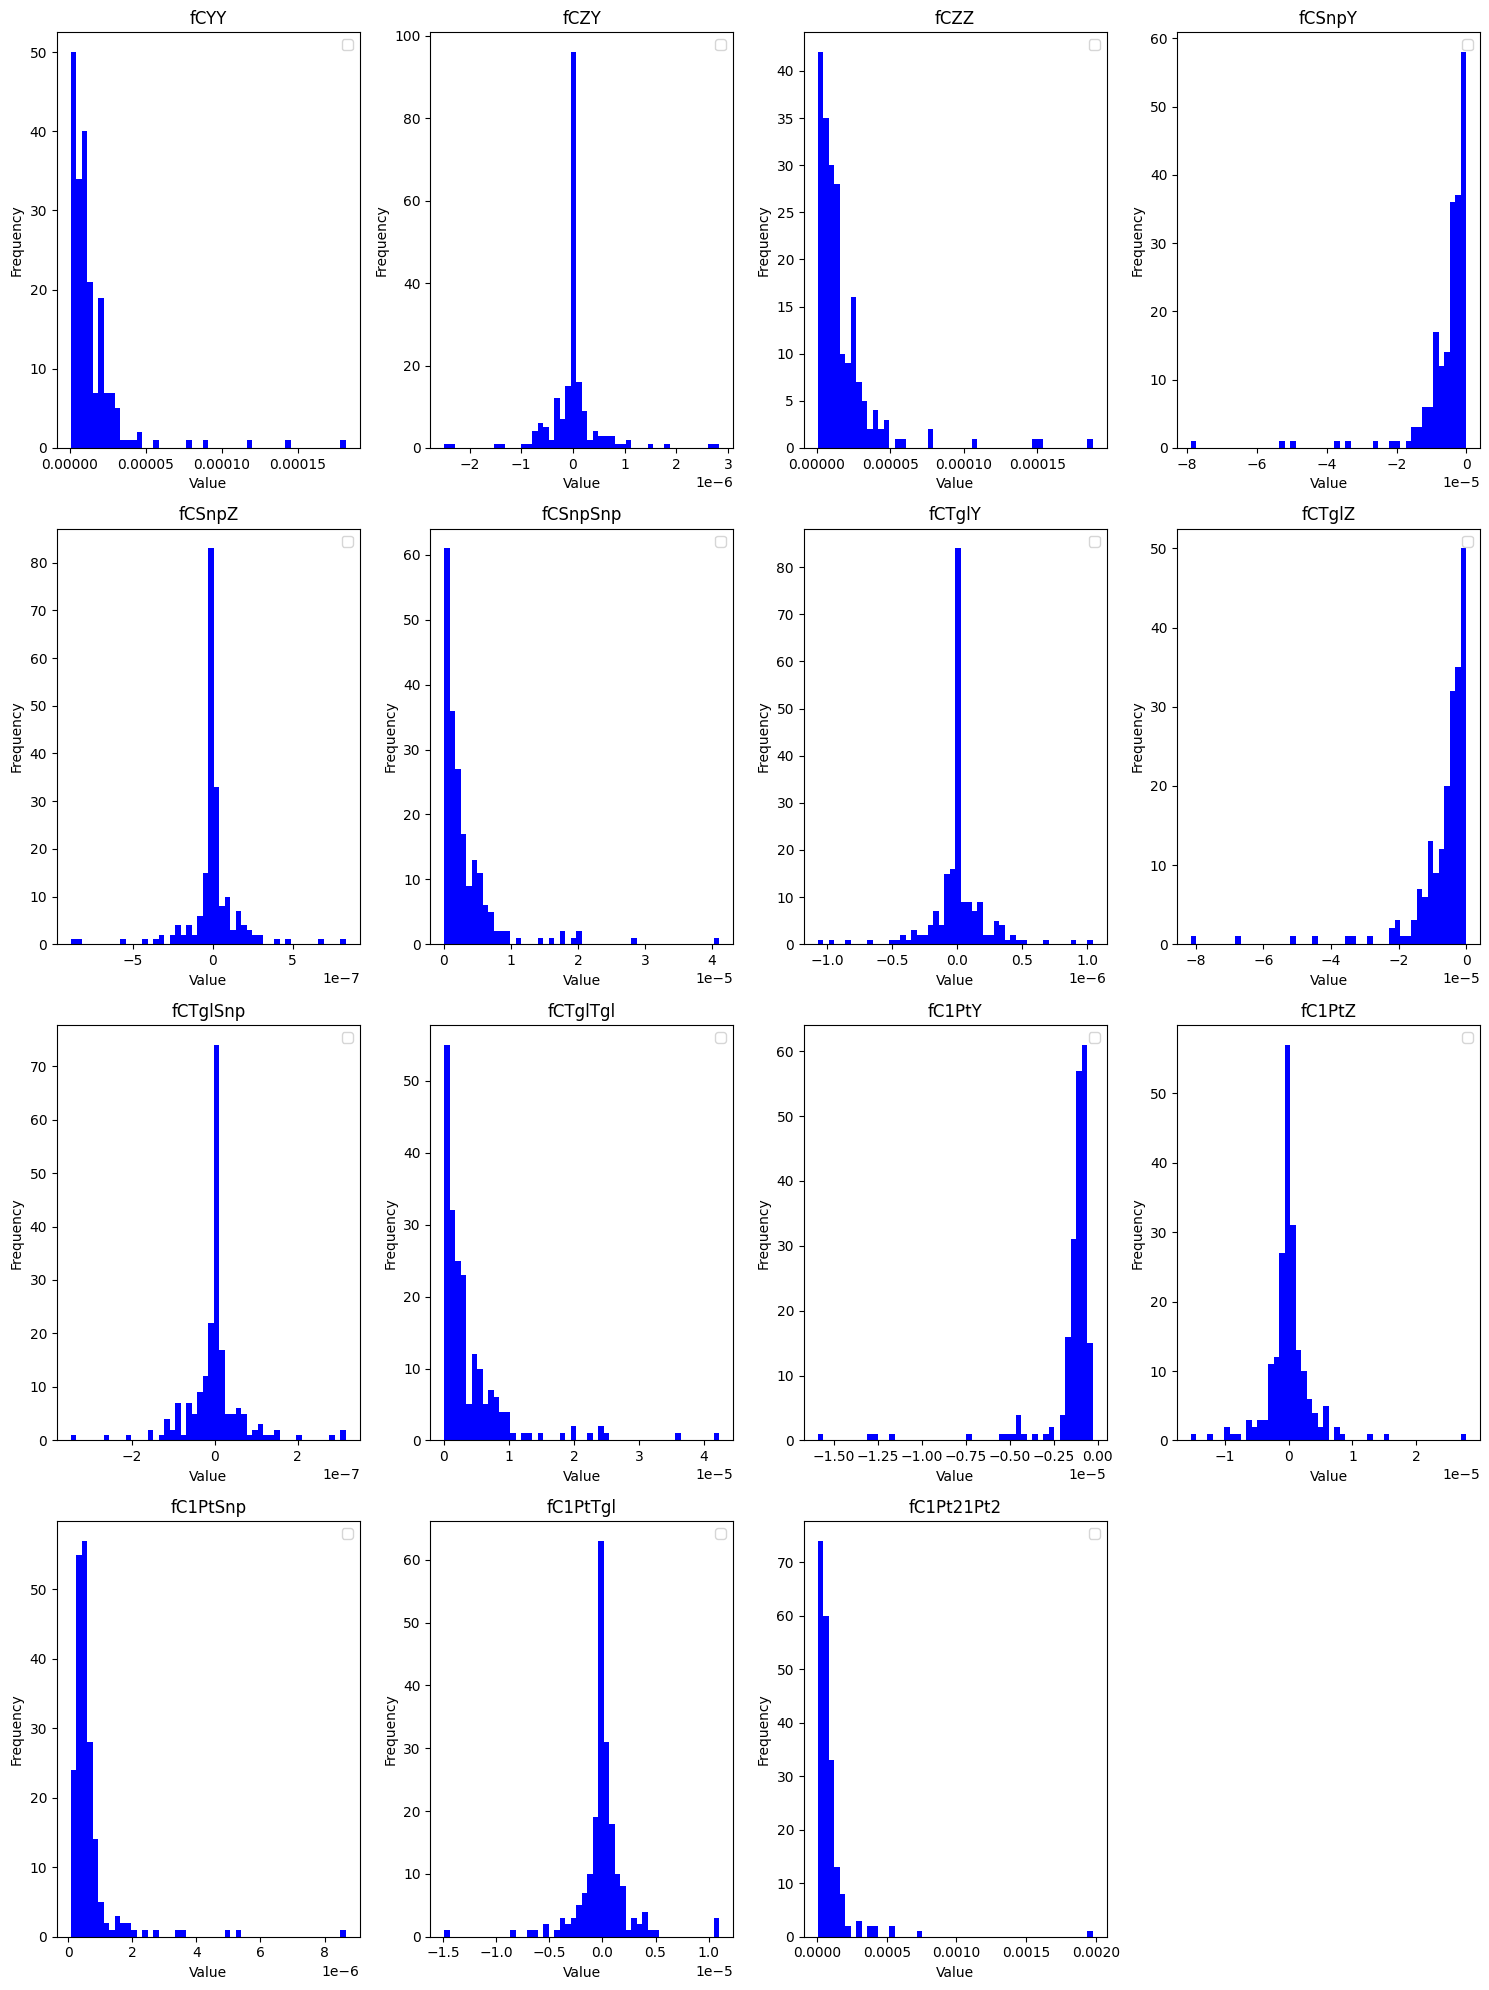

In [5]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfredtrackcov' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

/tmp/ipykernel_2193192/958114489.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fTgl
Plotting fSigned1Pt
Plotting fItsNCls
Plotting fTpcNClsCrossedRows
Plotting fTpcChi2NCl


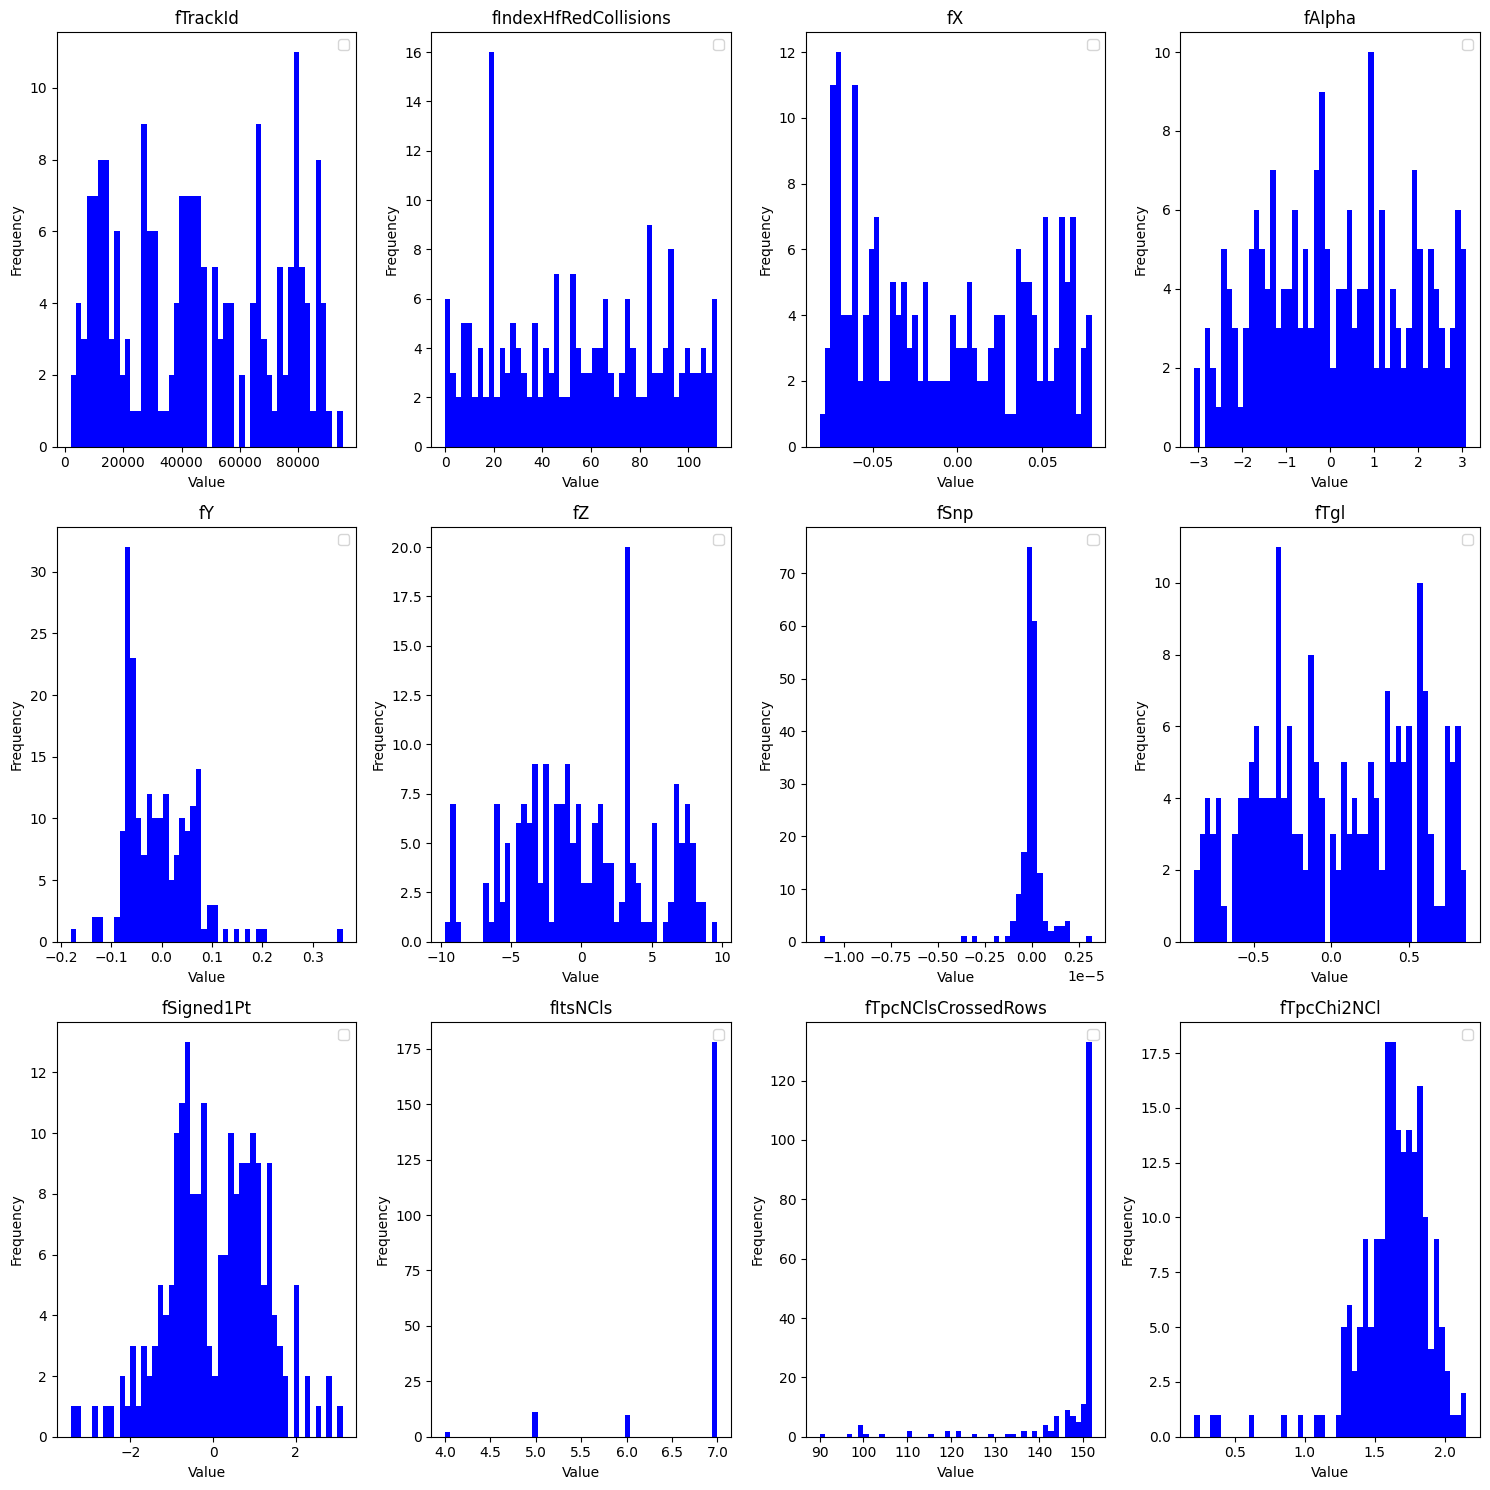

In [6]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfredtrackbase' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

/tmp/ipykernel_2193192/687397439.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


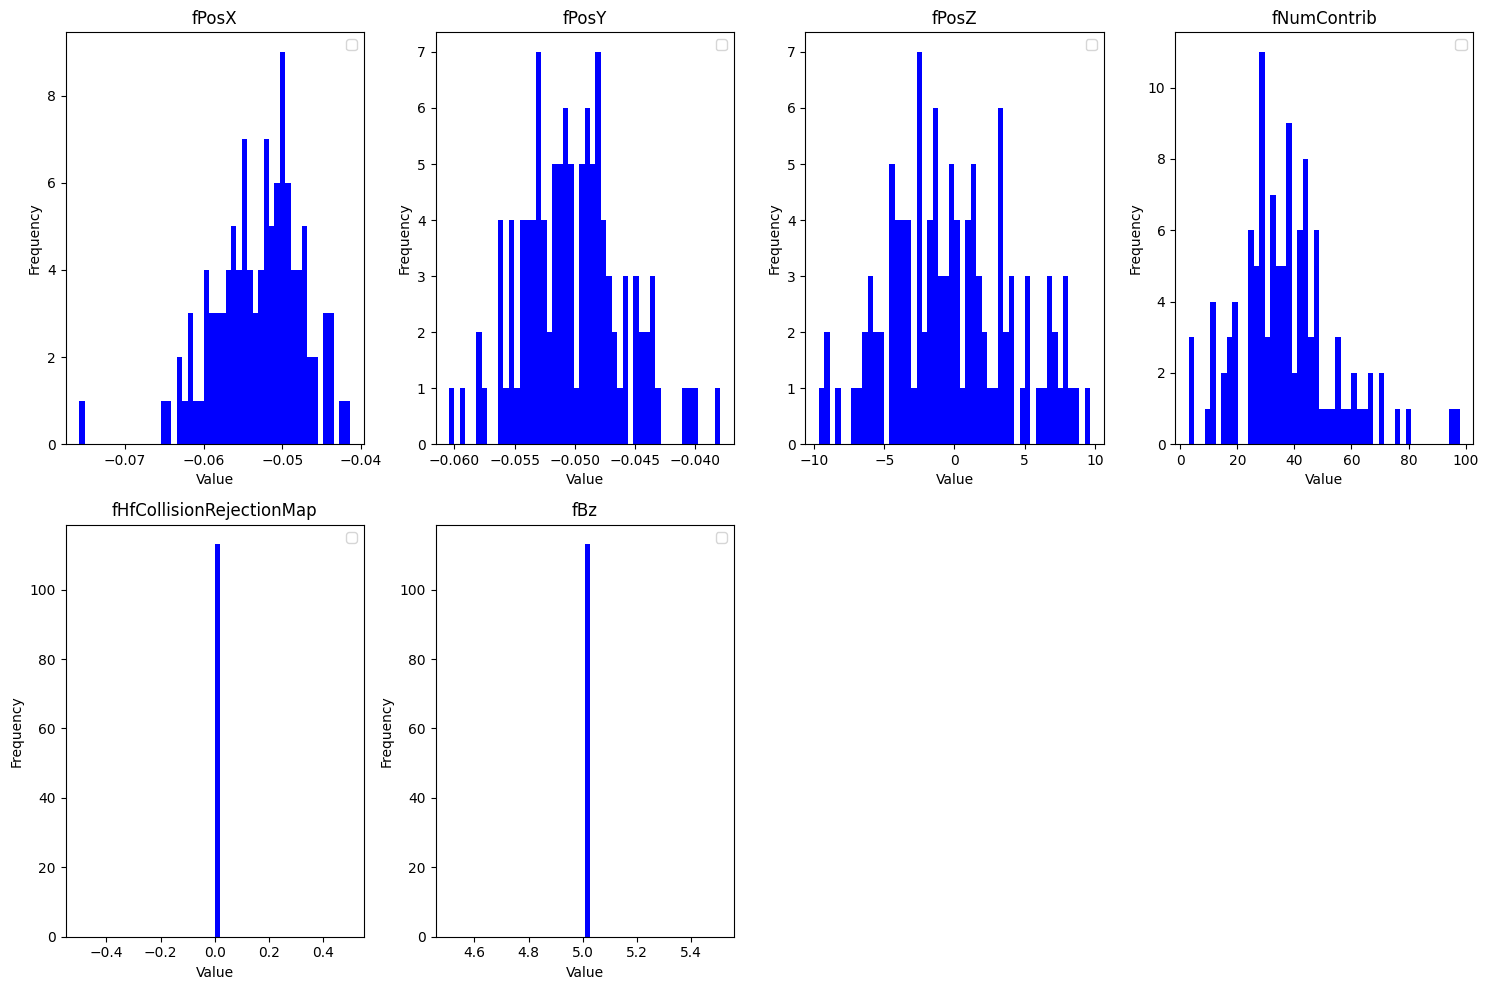

In [7]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfredcollision' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

/tmp/ipykernel_2193192/799176227.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fCovZZ


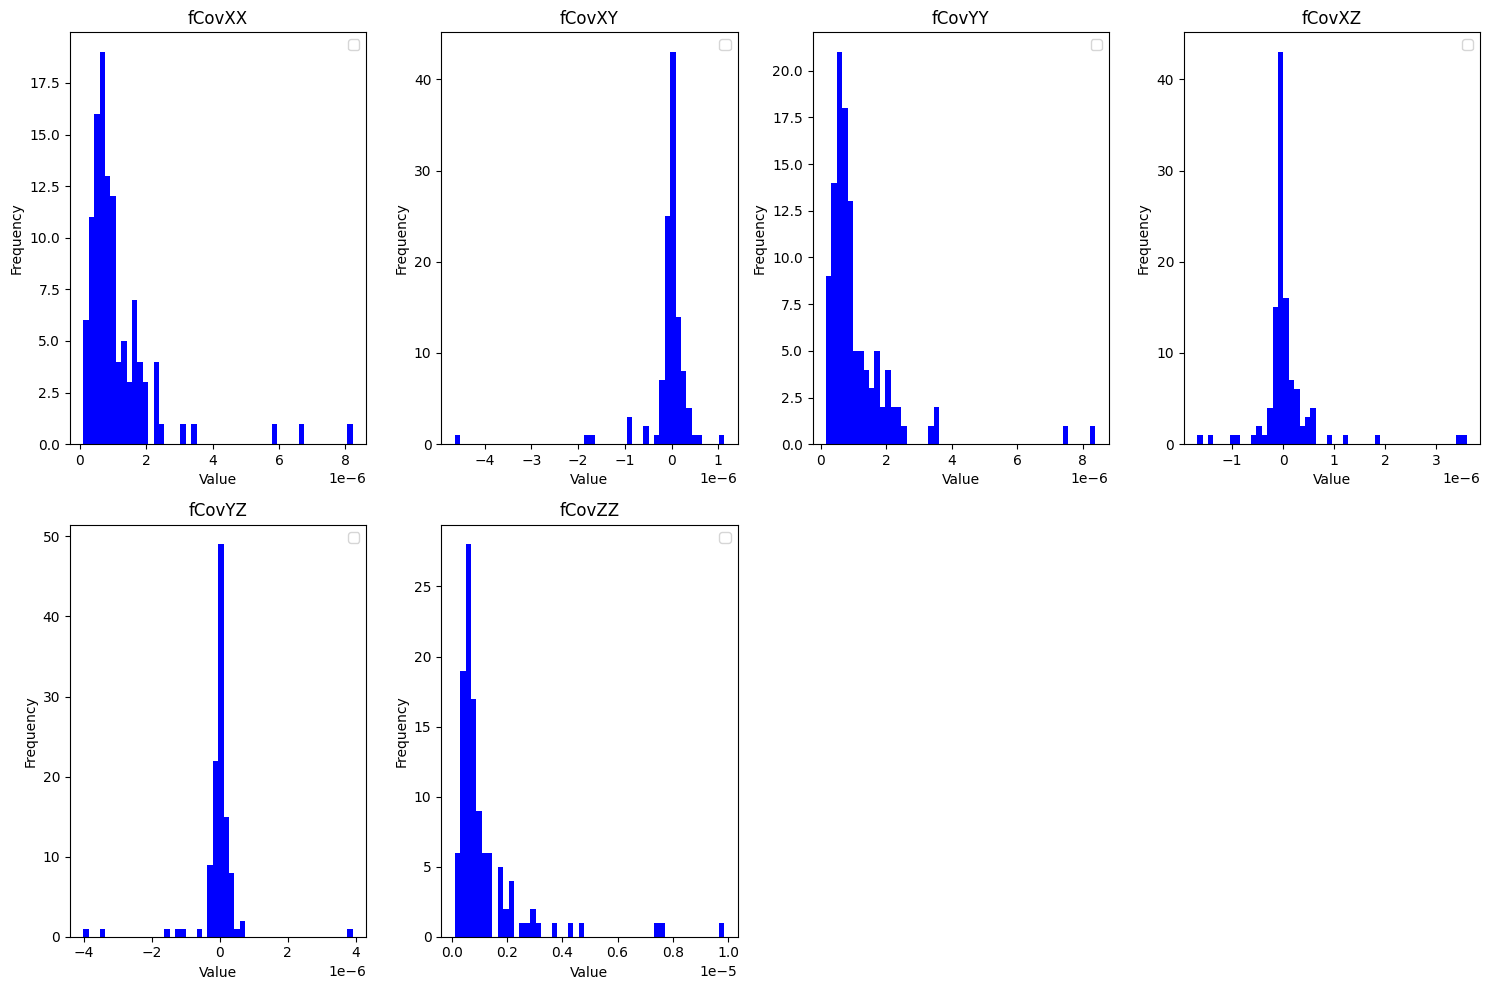

In [8]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfredcollextra' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

/tmp/ipykernel_2193192/1899350413.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fCTglY
Plotting fCTglZ
Plotting fCTglSnp
Plotting fCTglTgl
Plotting fC1PtY
Plotting fC1PtZ
Plotting fC1PtSnp
Plotting fC1PtTgl
Plotting fC1Pt21Pt2


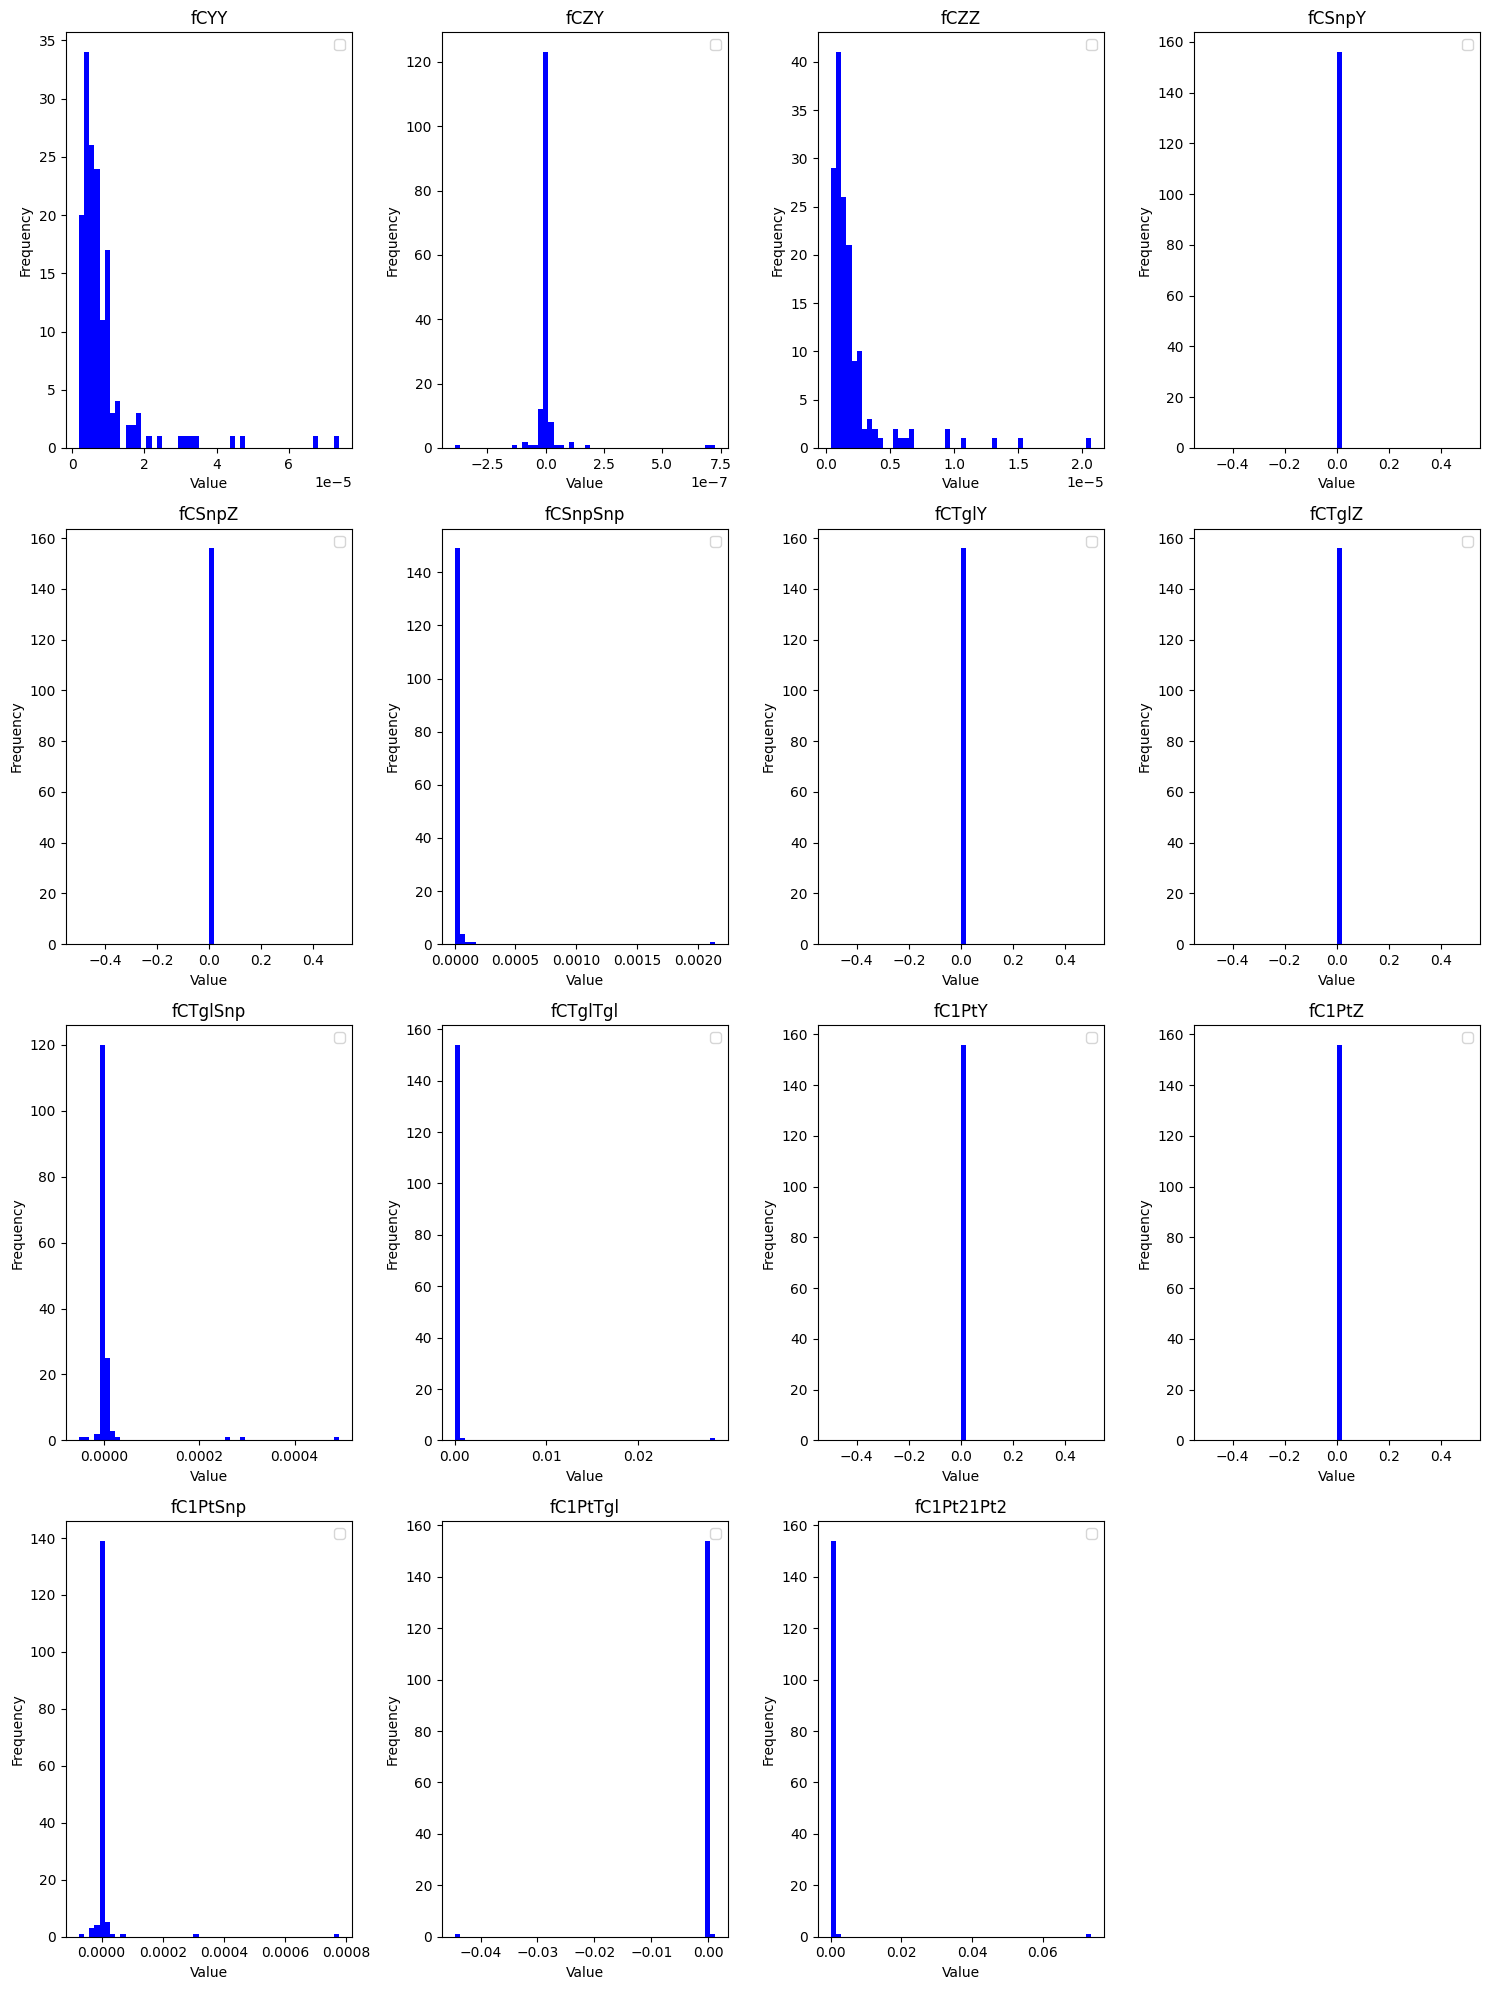

In [9]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfred3prongscov' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

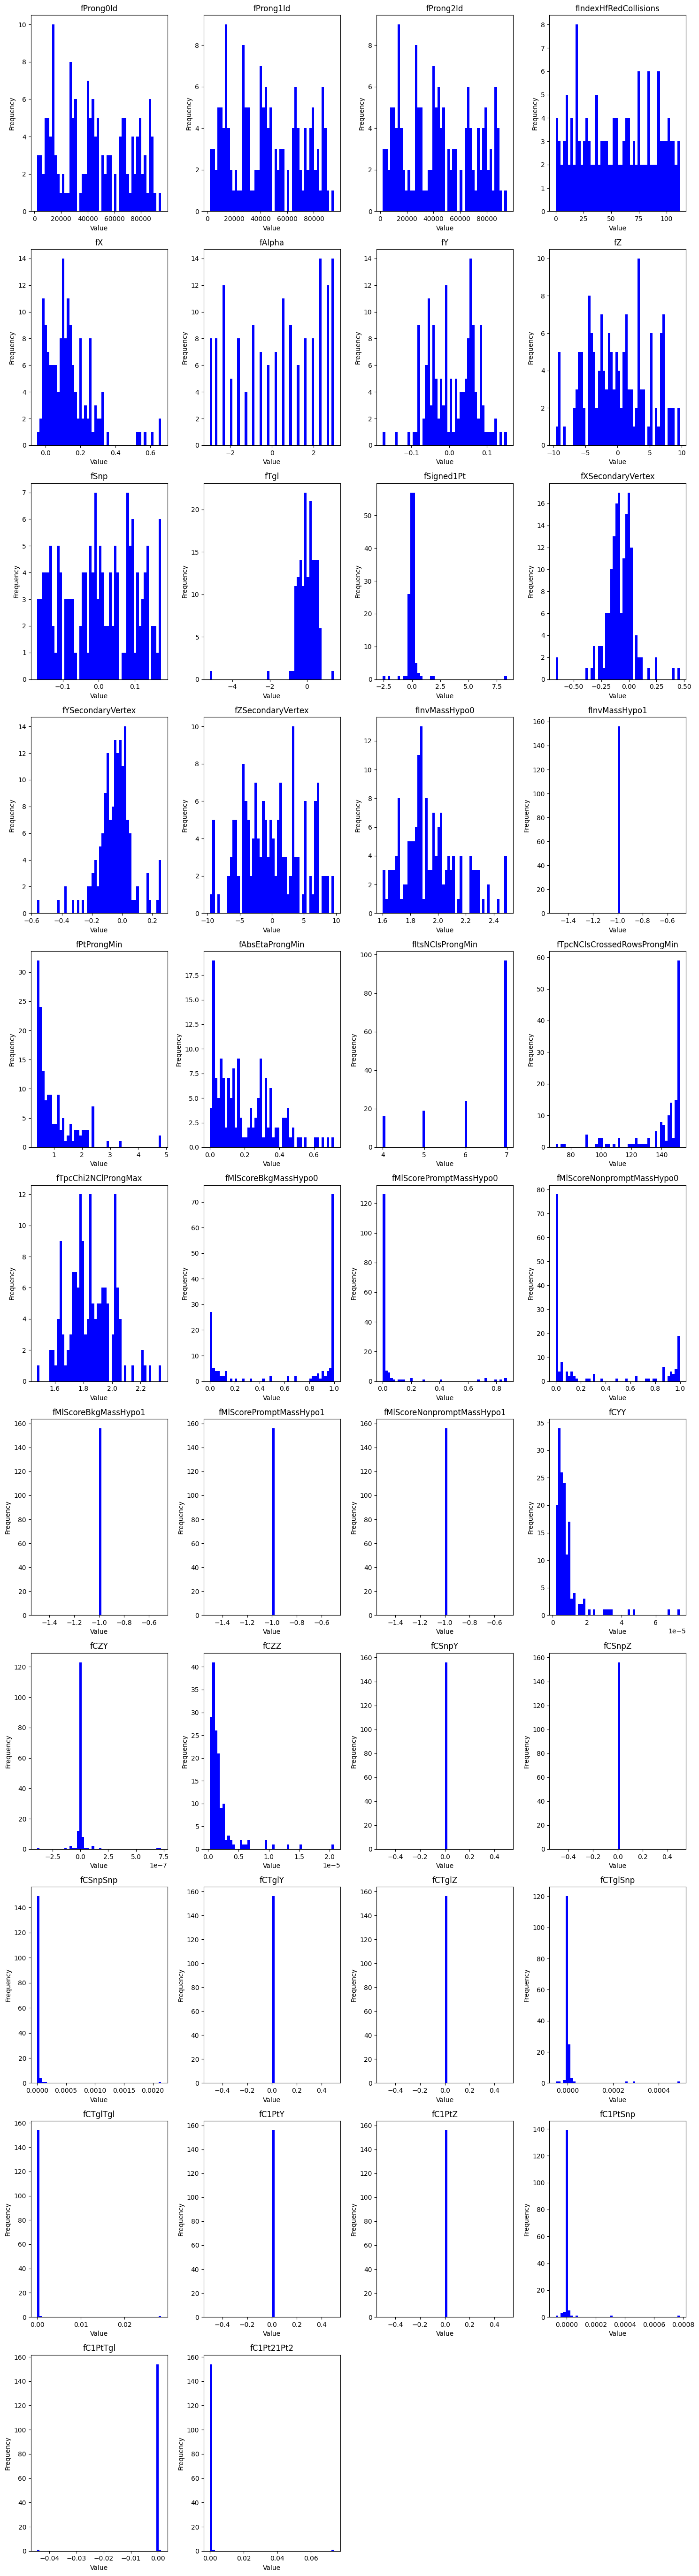

In [10]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfred3prong' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

import numpy as np
# Filter to numeric columns with at least one finite value
numeric_columns = [
    col for col in full_df.columns
    if np.issubdtype(full_df[col].dtype, np.number) and np.isfinite(full_df[col]).any()
]

n_columns = len(numeric_columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    print(f"Plotting {column}")
    data = full_df[column].dropna()
    axes[i].hist(data, bins=50, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove unused axes
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

/tmp/ipykernel_2193192/1967894679.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


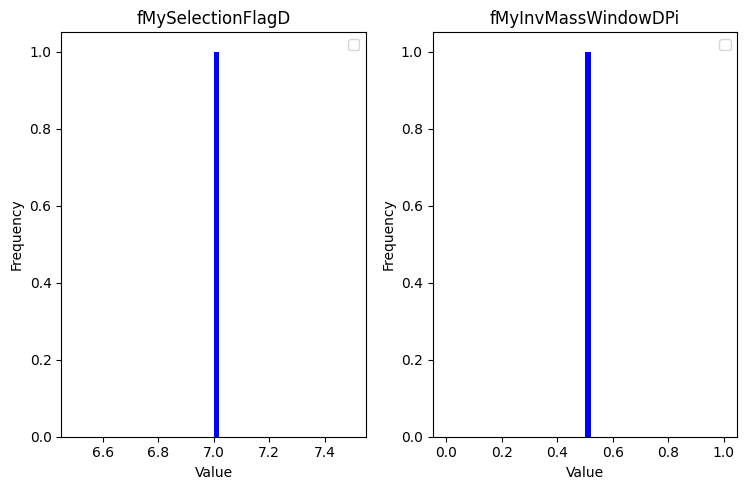

In [11]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcandb0config' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfmcrecreddstpi;1', 'DF_2387899194678550/O2hforigcolcount;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollcent;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredmomddaugs;1', 'DF_2387899194678550/O2hfredpiddau0_001;1', 'DF_2387899194678550/O2hfredpiddau1_001;1', 'DF_2387899194678550/O2hfredpiddau2_001;1', 'DF_2387899194678550/O2hfredqvector;1', 'DF_2387899194678550/O2hfredsoftpibase;1', 'DF_2387899194678550/O2hfredsoftpicov;1', 'DF_2387899194678550/O2hfredsoftpipid;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackmom;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parent

/tmp/ipykernel_2193192/979569677.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


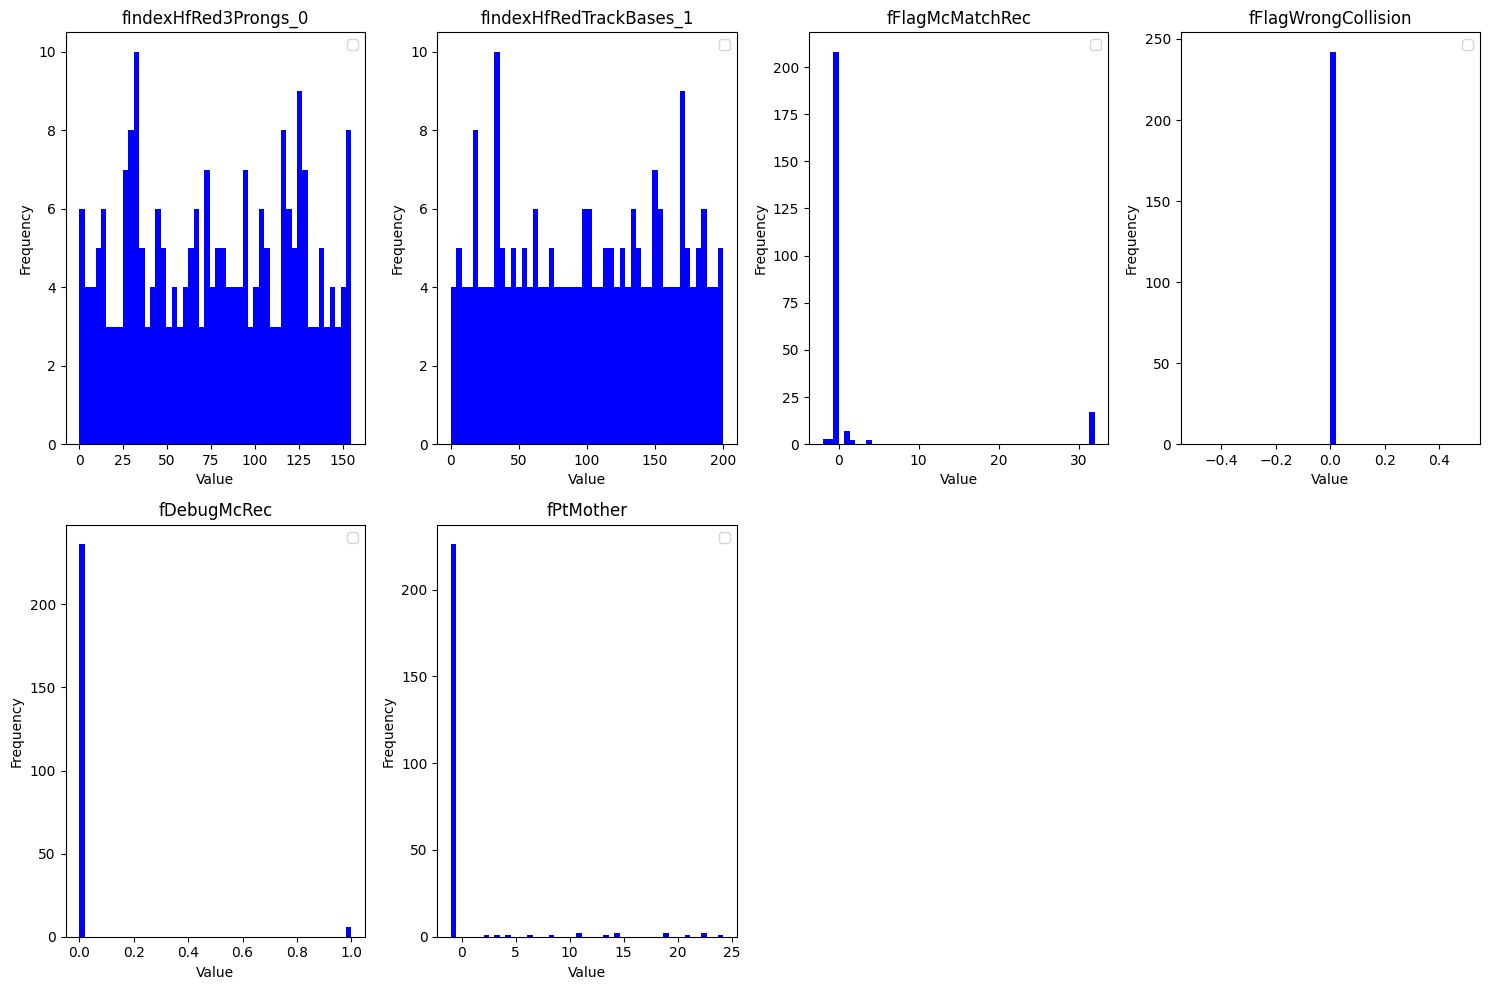

In [12]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfmcrecreddppi' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [13]:
print(f"fFlagMcMatchRec values: {sorted(full_df['fFlagMcMatchRec'].unique())}")

fFlagMcMatchRec values: [-2, -1, 0, 1, 2, 4, 32]
